In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc
from lmfit.models import PolynomialModel
import math

In [2]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select inc_dincident,inc_dreported from DatixCRM.dbo.incidents_main where inc_type='PAT' and inc_category='MEDIC' and inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
print(df)

     inc_dincident inc_dreported
0       2016-03-31    2016-03-31
1       2016-03-31    2016-04-01
2       2016-04-01    2016-04-01
3       2016-03-25    2016-04-01
4       2016-04-02    2016-04-02
5       2016-04-01    2016-04-02
6       2016-04-01    2016-04-02
7       2016-04-02    2016-04-02
8       2016-04-02    2016-04-02
9       2016-04-03    2016-04-03
10      2016-04-03    2016-04-03
11      2016-04-02    2016-04-04
12      2016-04-02    2016-04-04
13      2016-04-02    2016-04-04
14      2016-04-02    2016-04-04
15      2016-04-02    2016-04-04
16      2016-04-04    2016-04-04
17      2016-04-02    2016-04-04
18      2016-04-04    2016-04-04
19      2016-04-02    2016-04-04
20      2016-03-23    2016-04-04
21      2016-04-02    2016-04-04
22      2016-04-02    2016-04-04
23      2016-04-04    2016-04-04
24      2016-04-04    2016-04-05
25      2016-04-05    2016-04-05
26      2016-03-30    2016-04-05
27      2016-04-06    2016-04-06
28      2016-04-06    2016-04-06
29      20

In [3]:
df_inc = df.copy()
df_inc = df_inc[df_inc.inc_dincident > '2016-03-31']
df_inc = df_inc[df_inc.inc_dincident < '2019-10-01']
print(df)

     inc_dincident inc_dreported
0       2016-03-31    2016-03-31
1       2016-03-31    2016-04-01
2       2016-04-01    2016-04-01
3       2016-03-25    2016-04-01
4       2016-04-02    2016-04-02
5       2016-04-01    2016-04-02
6       2016-04-01    2016-04-02
7       2016-04-02    2016-04-02
8       2016-04-02    2016-04-02
9       2016-04-03    2016-04-03
10      2016-04-03    2016-04-03
11      2016-04-02    2016-04-04
12      2016-04-02    2016-04-04
13      2016-04-02    2016-04-04
14      2016-04-02    2016-04-04
15      2016-04-02    2016-04-04
16      2016-04-04    2016-04-04
17      2016-04-02    2016-04-04
18      2016-04-04    2016-04-04
19      2016-04-02    2016-04-04
20      2016-03-23    2016-04-04
21      2016-04-02    2016-04-04
22      2016-04-02    2016-04-04
23      2016-04-04    2016-04-04
24      2016-04-04    2016-04-05
25      2016-04-05    2016-04-05
26      2016-03-30    2016-04-05
27      2016-04-06    2016-04-06
28      2016-04-06    2016-04-06
29      20

In [4]:
month_year = df.groupby([df_inc.inc_dincident.dt.year, df_inc.inc_dincident.dt.month]).agg('count')
print(month_year.values)

[[143 143]
 [186 186]
 [135 135]
 [126 126]
 [160 160]
 [159 159]
 [203 203]
 [187 187]
 [189 189]
 [178 178]
 [170 170]
 [195 195]
 [181 181]
 [207 207]
 [248 248]
 [215 215]
 [238 238]
 [237 237]
 [243 243]
 [235 235]
 [203 203]
 [209 209]
 [192 192]
 [227 227]
 [247 247]
 [271 271]
 [202 202]
 [201 201]
 [193 193]
 [195 195]
 [232 232]
 [227 227]
 [240 240]
 [243 243]
 [237 237]
 [249 249]
 [225 225]
 [249 249]
 [282 282]
 [323 323]
 [237 237]
 [253 253]]


In [5]:
days_in_month = np.ones(len(month_year.values))*31
days_in_month[0] = 30
days_in_month[2] = 30
days_in_month[5] = 30
days_in_month[7] = 30
days_in_month[10] = 28
days_in_month[12] = 30
days_in_month[14] = 30
days_in_month[17] = 30
days_in_month[19] = 30
days_in_month[22] = 28
days_in_month[24] = 30
days_in_month[26] = 30
days_in_month[29] = 30
days_in_month[31] = 30
days_in_month[34] = 28
days_in_month[36] = 30
days_in_month[38] = 30
days_in_month[41] = 30
print(days_in_month)

[30. 31. 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31. 30. 31. 31. 30.
 31. 30. 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31. 31. 28. 31.
 30. 31. 30. 31. 31. 30.]


In [6]:
months_labels = ['Apr 16', 'May 16', 'Jun 16', 'Jul 16', 'Aug 16', 'Sep 16', 'Oct 16', 'Nov 16', 'Dec 16', 'Jan 17', 'Feb 17', 'Mar 17', 'Apr 17', 'May 17', 'Jun 17', 'Jul 17', 'Aug 17', 'Sep 17', 'Oct 17', 'Nov 17', 'Dec 17', 'Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18', 'Nov 18', 'Dec 18', 'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19', 'Sep 19']

In [7]:
num_per_day = month_year.inc_dincident.values/days_in_month
num_per_day_err = np.sqrt(month_year.inc_dincident.values)/days_in_month

(-0.5, 3301.5, 495.5, -0.5)

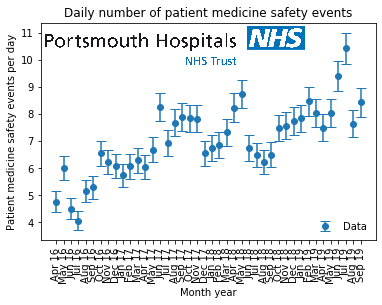

In [8]:
plt.errorbar(months_labels,num_per_day,num_per_day_err,capsize=5,fmt='o',label='Data');
plt.xticks(rotation='vertical');
plt.legend(loc='lower right',frameon=False)
plt.ylabel('Patient medicine safety events per day')
plt.xlabel('Month year')
plt.title('Daily number of patient medicine safety events')
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.125+0.01,0.5, 0.6, 0.6], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
ax.imshow(img)
ax.axis('off')  # get rid of the ticks and ticklabels

In [9]:
data_x = np.array([i for i in range(len(months_labels))])
data_y = num_per_day

In [10]:
# data fit
polynomial_mod = PolynomialModel(1)
pars = polynomial_mod.guess(data_y, x=data_x, c0=data_y[0], c1=0)
model = polynomial_mod
out = model.fit(data_y, pars, x=data_x)

(-0.5, 3301.5, 495.5, -0.5)

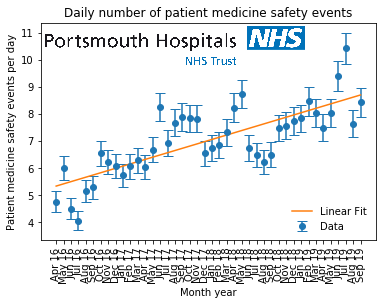

In [11]:
plt.errorbar(months_labels,num_per_day,num_per_day_err,capsize=5,fmt='o',label='Data');
plt.plot(months_labels, out.best_fit, label='Linear Fit')
plt.xticks(rotation='vertical');
plt.legend(loc='lower right',frameon=False)
plt.ylabel('Patient medicine safety events per day')
plt.xlabel('Month year')
plt.title('Daily number of patient medicine safety events')
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.125+0.01,0.5, 0.6, 0.6], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
ax.imshow(img)
ax.axis('off')  # get rid of the ticks and ticklabels

In [12]:
season_labels = ['Spring' for i in range(len(months_labels))]
for i in range(len(season_labels)):
    if 'Ju' in months_labels[i]: season_labels[i]='Summer'
    elif 'Au' in months_labels[i]: season_labels[i]='Summer'
    elif 'Se' in months_labels[i]: season_labels[i]='Autumn'
    elif 'Oc' in months_labels[i]: season_labels[i]='Autumn'
    elif 'No' in months_labels[i]: season_labels[i]='Autumn'
    elif 'De' in months_labels[i]: season_labels[i]='Winter'
    elif 'Ja' in months_labels[i]: season_labels[i]='Winter'
    elif 'Fe' in months_labels[i]: season_labels[i]='Winter'
print(season_labels)
colors = ['red','green','blue','purple']
season_codes = []
for season in season_labels:
    if season == 'Spring': season_codes.append(0)
    elif season == 'Summer': season_codes.append(1)
    elif season == 'Autumn': season_codes.append(2)
    else: season_codes.append(3)
print(season_codes)
season_colours = []
for season in season_labels:
    if season == 'Spring': season_colours.append('red')
    elif season == 'Summer': season_colours.append('green')
    elif season == 'Autumn': season_colours.append('blue')
    else: season_colours.append('purple')
print(season_colours)
print(len(months_labels))
print(len(num_per_day))
print(len(num_per_day_err))
print(len(season_colours))

['Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn']
[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2]
['red', 'red', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'purple', 'purple', 'purple', 'red', 'red', 'red', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'purple', 'purple', 'purple', 'red', 'red', 'red', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'purple', 'purple', 'purple', 'red', 'red', 'red', 'green', 'green', 'green', 'blue']
42
42
42
42


In [13]:
num_per_spring_day = np.zeros(len(num_per_day))
num_per_summer_day = np.zeros(len(num_per_day))
num_per_autumn_day = np.zeros(len(num_per_day))
num_per_winter_day = np.zeros(len(num_per_day))
for idx,season in enumerate(season_labels):
    if season == 'Spring': num_per_spring_day[idx] = num_per_day[idx]
    elif season == 'Summer': num_per_summer_day[idx] = num_per_day[idx]
    elif season == 'Autumn': num_per_autumn_day[idx] = num_per_day[idx]
    else: num_per_winter_day[idx] = num_per_day[idx]
print(num_per_spring_day)

[4.76666667 6.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         6.29032258
 6.03333333 6.67741935 0.         0.         0.         0.
 0.         0.         0.         0.         0.         7.32258065
 8.23333333 8.74193548 0.         0.         0.         0.
 0.         0.         0.         0.         0.         8.03225806
 7.5        8.03225806 0.         0.         0.         0.        ]


(-0.5, 3301.5, 495.5, -0.5)

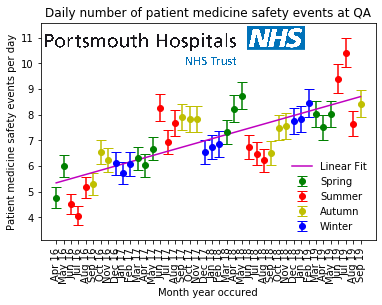

In [14]:
plt.errorbar(months_labels,num_per_spring_day,num_per_day_err,capsize=5,fmt='go',label='Spring');
plt.errorbar(months_labels,num_per_summer_day,num_per_day_err,capsize=5,fmt='ro',label='Summer');
plt.errorbar(months_labels,num_per_autumn_day,num_per_day_err,capsize=5,fmt='yo',label='Autumn');
plt.errorbar(months_labels,num_per_winter_day,num_per_day_err,capsize=5,fmt='bo',label='Winter');
plt.plot(months_labels, out.best_fit, '-m',label='Linear Fit')
plt.xticks(rotation='vertical');
plt.legend(loc='lower right',frameon=False)
plt.ylabel('Patient medicine safety events per day')
plt.xlabel('Month year occured')
plt.title('Daily number of patient medicine safety events at QA')
plt.ylim(bottom=3.1)
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.125+0.01,0.5, 0.6, 0.6], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
ax.imshow(img)
ax.axis('off')  # get rid of the ticks and ticklabels

In [15]:
df_rep = df.copy()
df_rep = df_rep[df_rep.inc_dreported > '2016-03-31']
df_rep = df_rep[df_rep.inc_dreported < '2019-10-01']

In [16]:
month_year = df.groupby([df_rep.inc_dreported.dt.year, df_rep.inc_dreported.dt.month]).agg('count')

In [17]:
num_per_day = month_year.inc_dreported.values/days_in_month
num_per_day_err = np.sqrt(month_year.inc_dreported.values)/days_in_month

In [18]:
data_x = np.array([i for i in range(len(months_labels))])
data_y = num_per_day

In [19]:
# data fit
polynomial_mod = PolynomialModel(1)
pars = polynomial_mod.guess(data_y, x=data_x, c0=data_y[0], c1=0)
model = polynomial_mod
out = model.fit(data_y, pars, x=data_x)

In [20]:
num_per_spring_day = np.ones(len(num_per_day))*100
num_per_summer_day = np.ones(len(num_per_day))*100
num_per_autumn_day = np.ones(len(num_per_day))*100
num_per_winter_day = np.ones(len(num_per_day))*100
for idx,season in enumerate(season_labels):
    if season == 'Spring': num_per_spring_day[idx] = num_per_day[idx]
    elif season == 'Summer': num_per_summer_day[idx] = num_per_day[idx]
    elif season == 'Autumn': num_per_autumn_day[idx] = num_per_day[idx]
    else: num_per_winter_day[idx] = num_per_day[idx]

(-0.5, 3301.5, 495.5, -0.5)

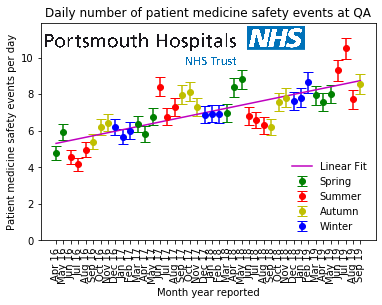

In [21]:
plt.errorbar(months_labels,num_per_spring_day,num_per_day_err,capsize=5,fmt='go',label='Spring');
plt.errorbar(months_labels,num_per_summer_day,num_per_day_err,capsize=5,fmt='ro',label='Summer');
plt.errorbar(months_labels,num_per_autumn_day,num_per_day_err,capsize=5,fmt='yo',label='Autumn');
plt.errorbar(months_labels,num_per_winter_day,num_per_day_err,capsize=5,fmt='bo',label='Winter');
plt.plot(months_labels, out.best_fit, '-m',label='Linear Fit')
plt.xticks(rotation='vertical');
plt.legend(loc='lower right',frameon=False)
plt.ylabel('Patient medicine safety events per day')
plt.xlabel('Month year reported')
plt.title('Daily number of patient medicine safety events at QA')
plt.ylim(bottom=0,top=11.9)
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.125+0.01,0.5, 0.6, 0.6], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
ax.imshow(img)
ax.axis('off')  # get rid of the ticks and ticklabels

In [22]:
# Import figure from bokeh.plotting
from bokeh.plotting import figure

# Import output_file and show from bokeh.io
from bokeh.io import show, output_notebook

from bokeh.models import ColumnDataSource, Whisker, Legend, LegendItem, Span, HoverTool


upper_spring = [x+e for x,e in zip(num_per_spring_day, num_per_day_err) ]
lower_spring = [x-e for x,e in zip(num_per_spring_day, num_per_day_err) ]
upper_summer = [x+e for x,e in zip(num_per_summer_day, num_per_day_err) ]
lower_summer = [x-e for x,e in zip(num_per_summer_day, num_per_day_err) ]
upper_autumn = [x+e for x,e in zip(num_per_autumn_day, num_per_day_err) ]
lower_autumn = [x-e for x,e in zip(num_per_autumn_day, num_per_day_err) ]
upper_winter = [x+e for x,e in zip(num_per_winter_day, num_per_day_err) ]
lower_winter = [x-e for x,e in zip(num_per_winter_day, num_per_day_err) ]

spring_source = ColumnDataSource(data=dict(groups=months_labels, counts=num_per_spring_day, upper=upper_spring, lower=lower_spring))
summer_source = ColumnDataSource(data=dict(groups=months_labels, counts=num_per_summer_day, upper=upper_summer, lower=lower_summer))
autumn_source = ColumnDataSource(data=dict(groups=months_labels, counts=num_per_autumn_day, upper=upper_autumn, lower=lower_autumn))
winter_source = ColumnDataSource(data=dict(groups=months_labels, counts=num_per_winter_day, upper=upper_winter, lower=lower_winter))

y_max = math.ceil(max(num_per_day) / 2.) * 2
p = figure(x_range=months_labels, title="Daily number of medicine patient safety events at QA", y_range=(0,y_max),
          x_axis_label='Month Year',y_axis_label='events per day',plot_width=900, plot_height=450,
           tools='pan,box_select,box_zoom,wheel_zoom,save,reset,help')

p.circle(months_labels,num_per_spring_day,color='green',size=10,alpha=0.5,nonselection_alpha=0, 
         hover_fill_color='black')
p.circle(months_labels,num_per_summer_day,color='red',size=10,alpha=0.5,nonselection_alpha=0, hover_fill_color='black')
p.circle(months_labels,num_per_autumn_day,color='yellow',size=10,alpha=0.5,nonselection_alpha=0, hover_fill_color='black')
p.circle(months_labels,num_per_winter_day,color='blue',size=10,alpha=0.5,nonselection_alpha=0, hover_fill_color='black')

p.add_layout(
    Whisker(source=spring_source, base="groups", upper="upper", lower="lower", level="overlay", line_color='green')
)
p.add_layout(
    Whisker(source=summer_source, base="groups", upper="upper", lower="lower", level="overlay", line_color='red')
)
p.add_layout(
    Whisker(source=autumn_source, base="groups", upper="upper", lower="lower", level="overlay", line_color='yellow')
)
p.add_layout(
    Whisker(source=winter_source, base="groups", upper="upper", lower="lower", level="overlay", line_color='blue')
)

r_linear = p.line(months_labels,out.best_fit,line_color='purple')

legend = Legend(items=[
    LegendItem(label="spring", renderers=[p.circle(0,0,color='green')]),
    LegendItem(label="summer", renderers=[p.circle(0,0,color='red')]),
    LegendItem(label="autumn", renderers=[p.circle(0,0,color='yellow')]),
    LegendItem(label="winter", renderers=[p.circle(0,0,color='blue')]),
    LegendItem(label='fit χ²/Nᵈᶠ = '+str(round(out.redchi,1)), renderers=[r_linear]),
])
p.add_layout(legend)

p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = math.pi/2
p.legend
#p.legend.orientation = "horizontal"
p.legend.location = "bottom_right"

# Create a HoverTool: hover
hover = HoverTool(tooltips=None,mode='hline')

# Add the hover tool to the figure p
p.add_tools(hover)

height = math.ceil(max(num_per_day) / 2.) * 2/6
width = height*3302/496
p.image_url(url=['nhsportsmouth.png'], x=0.2, y=y_max-0.1, w=width, h=height)

output_notebook()

Loading BokehJS ...

In [23]:
show(p)